In [1]:
import numpy as np
from CGN import solve_cgn
import matplotlib.pyplot as plt

In [2]:
def generate_matrix_given_cond_num(n: int, kappa: int, m = None): 
    if m == None:
        m = int(n/2)
    r_min = np.min((n, m))
    r_max = np.max((n, m))
    sing_vals = np.linspace(kappa, 1, r_min)
    U, _ = np.linalg.qr(np.random.randn(r_max,r_max)) # this should make a random orthogonal matrix
    V, _ = np.linalg.qr(np.random.randn(r_min,r_min)) 
    Sigma = np.vstack((np.diag(sing_vals), np.zeros(shape = (r_max - r_min,r_min))))
    A = U @ Sigma @ V

    return A

In [6]:
N = [4, 8, 16, 32, 64, 128, 256, 512, 1024, 2048]
kappa = [1, 1e1, 1e2, 1e3, 1e4, 1e5, 1e6, 1e7, 1e8, 1e9]

matrices = {}

for NN in N:
    matrices[NN] = {}
    for kk in kappa:
        matrices[NN][kk] = generate_matrix_given_cond_num(NN, kk)

In [7]:
res = {}

dim = 4
while True:
    if dim > 2048:
        break

    b = np.random.rand(dim, )

    res[dim] = {}

    for key in matrices[dim]:
        res[dim][key] = solve_cgn(matrices[dim][key], b)[:2]

    dim *= 2

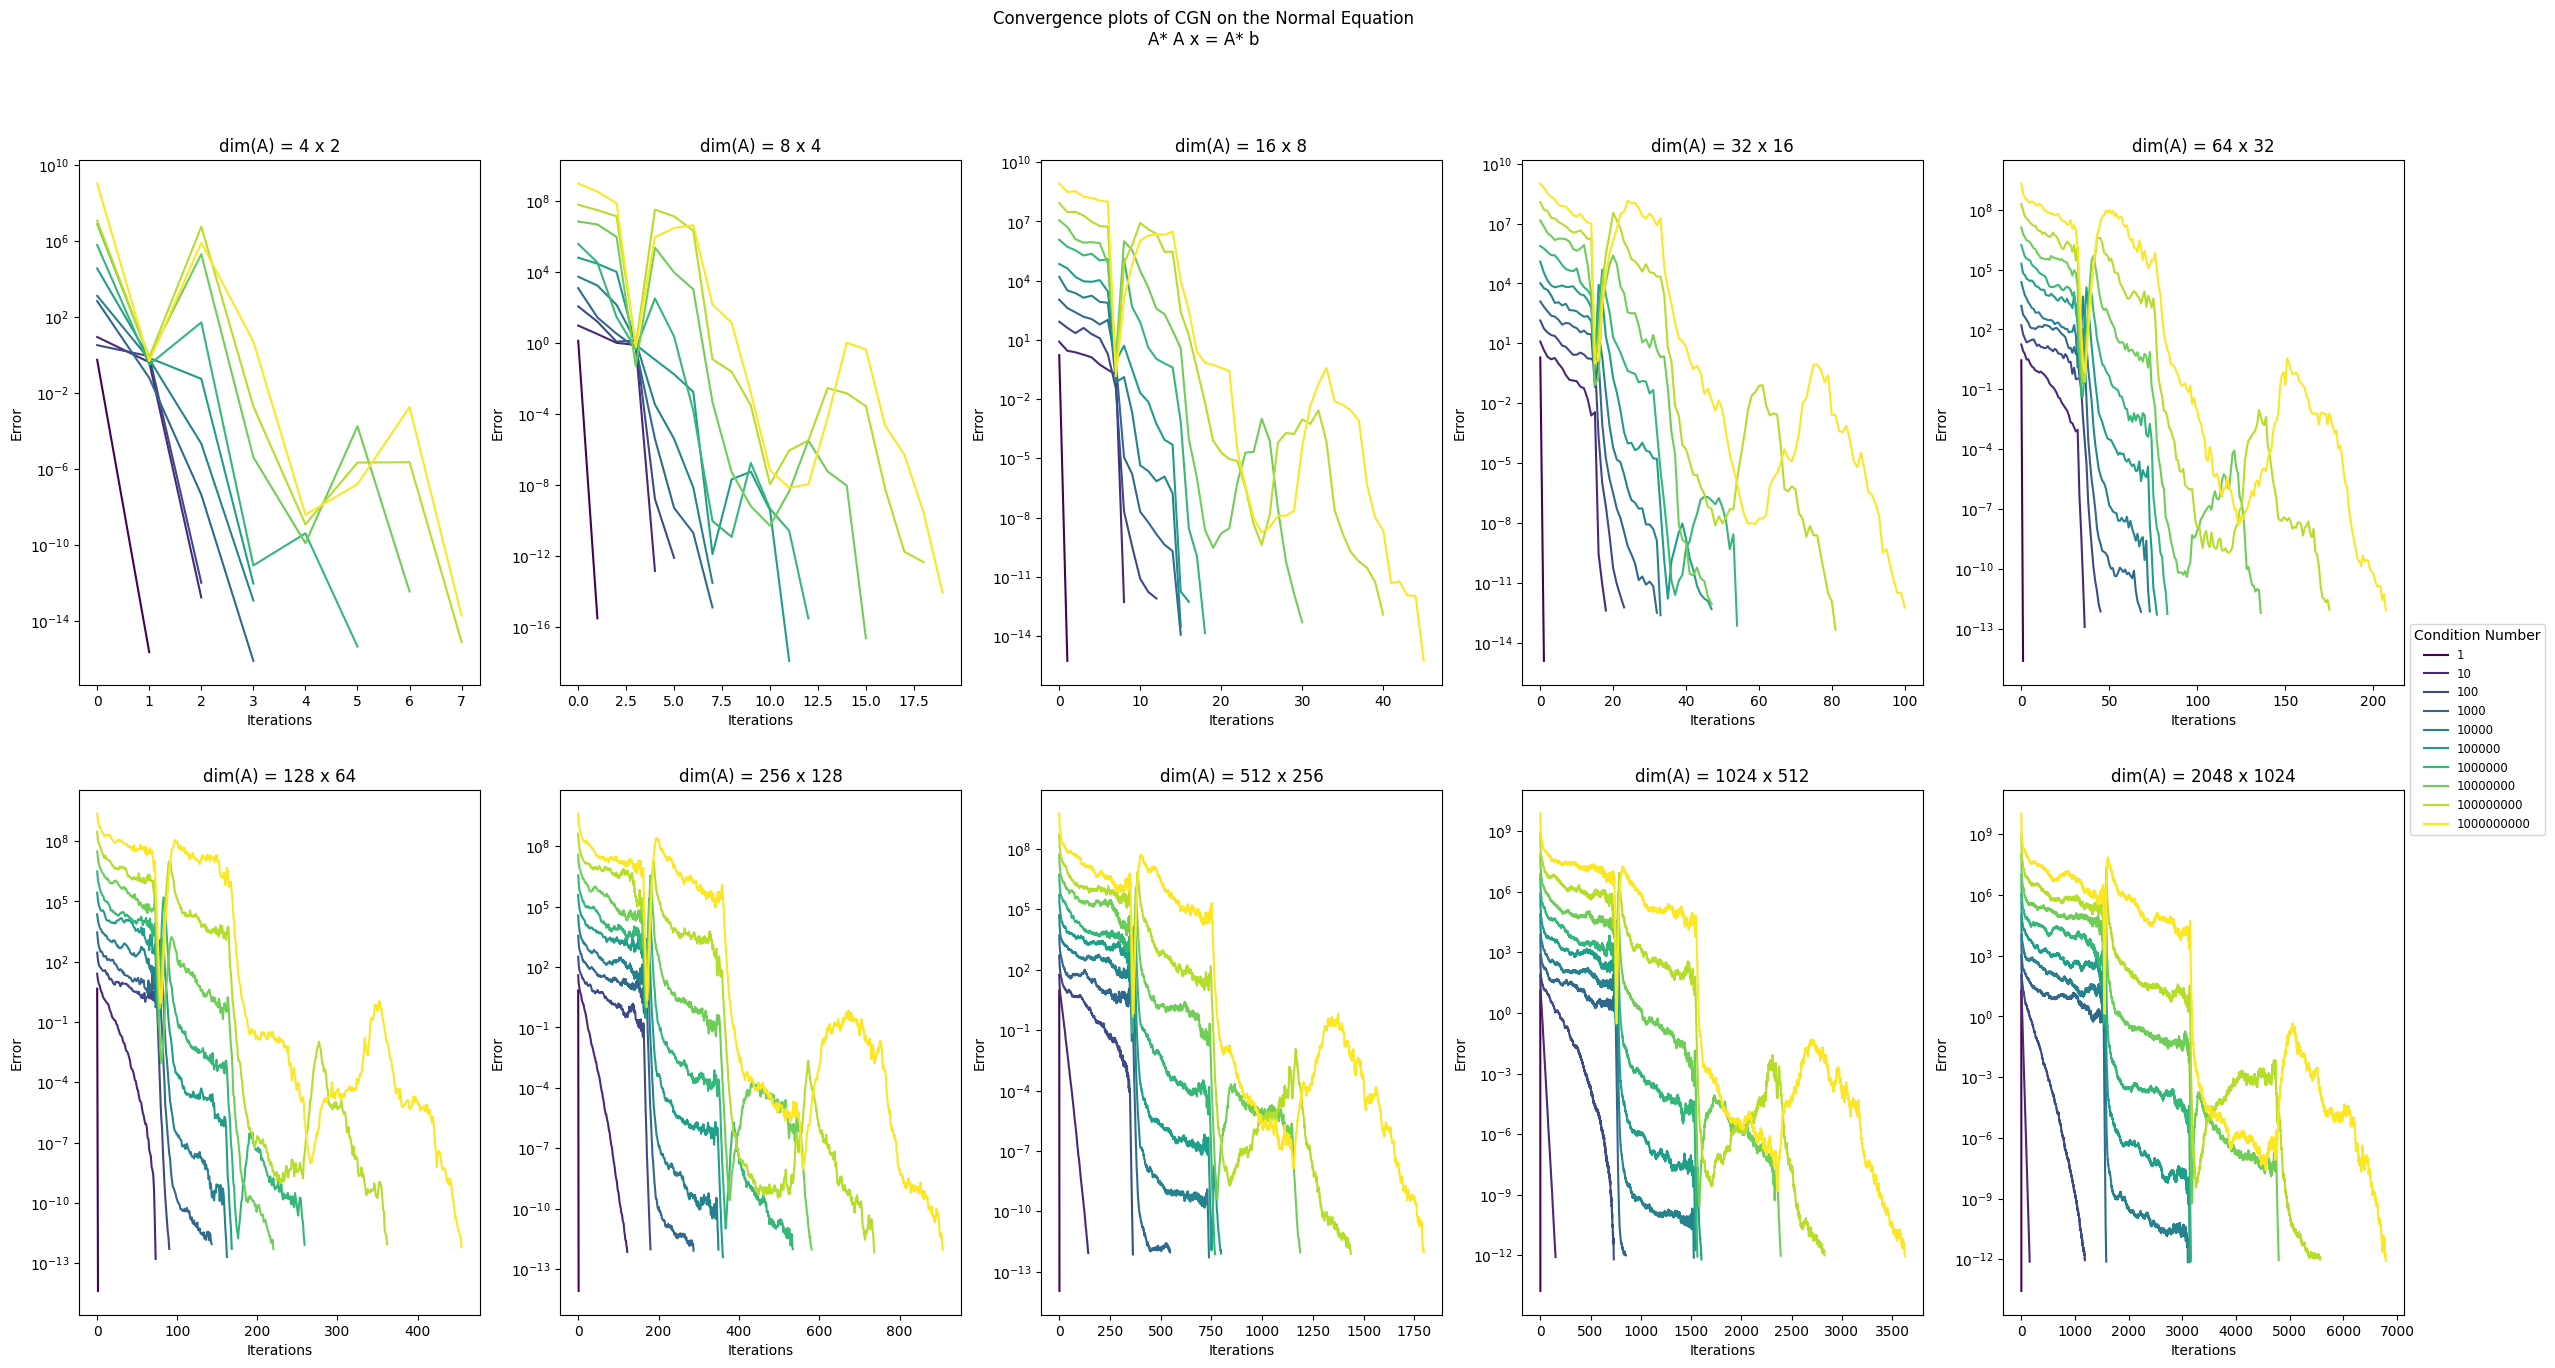

In [21]:
colors = plt.cm.viridis(np.linspace(0, 1, len(kappa)))  # Create a colormap

fig, ax = plt.subplots(2, 5, figsize=(30, 15))

for i, dim in enumerate([4, 8, 16, 32, 64, 128, 256, 512, 1024, 2048]):
    row, col = divmod(i, 5)
    for j, kk in enumerate(kappa):
        ax[row, col].plot(res[dim][kk][1], label=f'{int(kk)}' if i == 0 else "", color=colors[j])
        ax[row, col].set_yscale("log")
    ax[row, col].set_title(f"dim(A) = {dim} x {int(dim/2)}")
    ax[row, col].set_xlabel('Iterations')
    ax[row, col].set_ylabel('Error')

fig.suptitle('Convergence plots of CGN on the Normal Equation\nA* A x = A* b')
fig.legend(bbox_to_anchor=(0.9, 0.5), loc='center left', fontsize='small', title="Condition Number")


In [1]:
from CGS import solve_cgs;
from CGN import solve_cgn;
from scipy.sparse.linalg import qmr;
import matrixgenerators
import numpy as np
import matplotlib.pyplot as plt

Connor B — Experiment 1: Fixed condition number, variable size

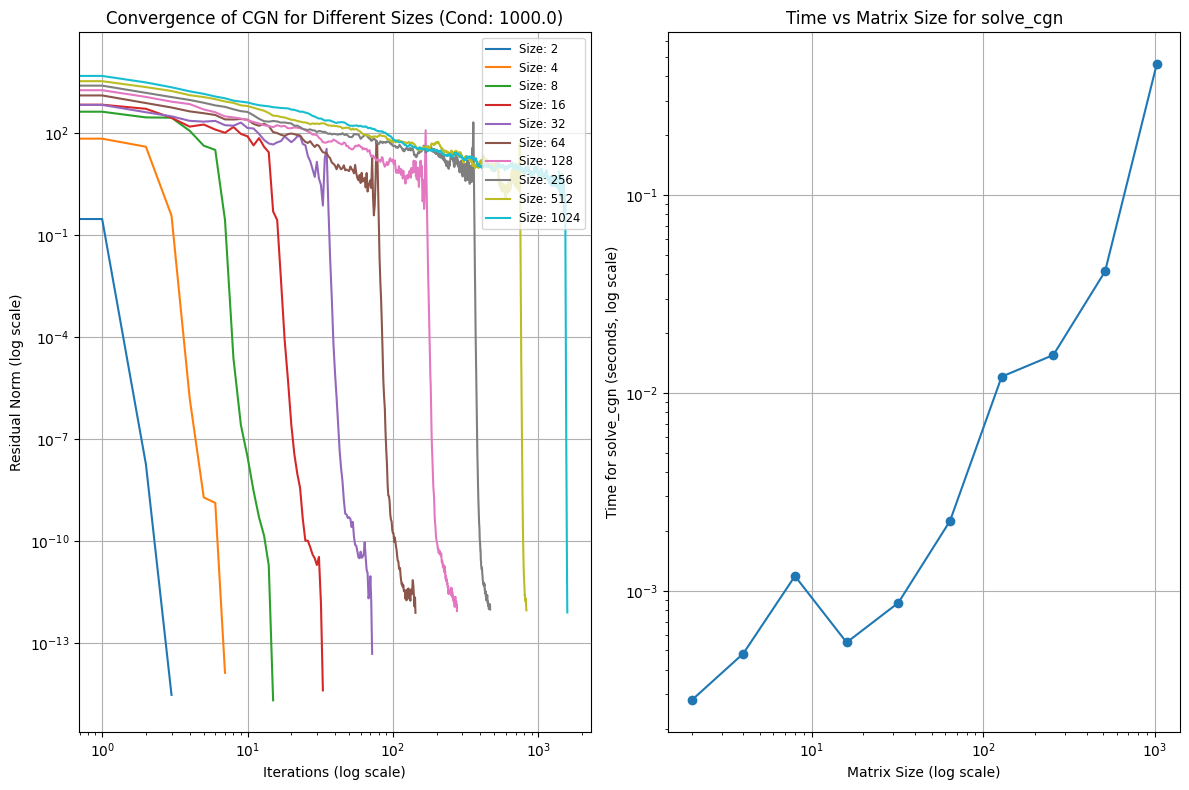

In [4]:
import time
import matplotlib.pyplot as plt

fixed_kappa = 1e3  
sizes = [2, 4, 8, 16, 32, 64, 128, 256, 512, 1024] # change as necessary

# store residuals and times
results_size = {}
timings_size = {}

for dim in sizes:
    b = np.random.rand(dim)  
    A = matrixgenerators.cond_num_matrix(dim, fixed_kappa)
    
    start_time = time.time()
    _, residuals, _ = solve_cgn(A, b)  
    end_time = time.time()
    
    results_size[dim] = residuals
    timings_size[dim] = end_time - start_time  # total time taken

plt.figure(figsize=(12, 8))

# residuals v iterations
plt.subplot(1, 2, 1)
for dim, residuals in results_size.items():
    plt.plot(residuals, label=f"Size: {dim}")
plt.xscale('log')
plt.yscale('log')
plt.xlabel("Iterations (log scale)")
plt.ylabel("Residual Norm (log scale)")
plt.title(f"Convergence of CGN for Different Sizes (Cond: {fixed_kappa})")
plt.legend(loc="upper right", fontsize="small")
plt.grid()

# time vs matrix size
plt.subplot(1, 2, 2)
plt.plot(timings_size.keys(), timings_size.values(), marker='o')
plt.xscale('log')
plt.yscale('log')
plt.xlabel("Matrix Size (log scale)")
plt.ylabel("Time for solve_cgn (seconds, log scale)")
plt.title("Time vs Matrix Size for solve_cgn")
plt.grid()

plt.tight_layout()
plt.show()


Now, fixed size of 100 with variable condition number

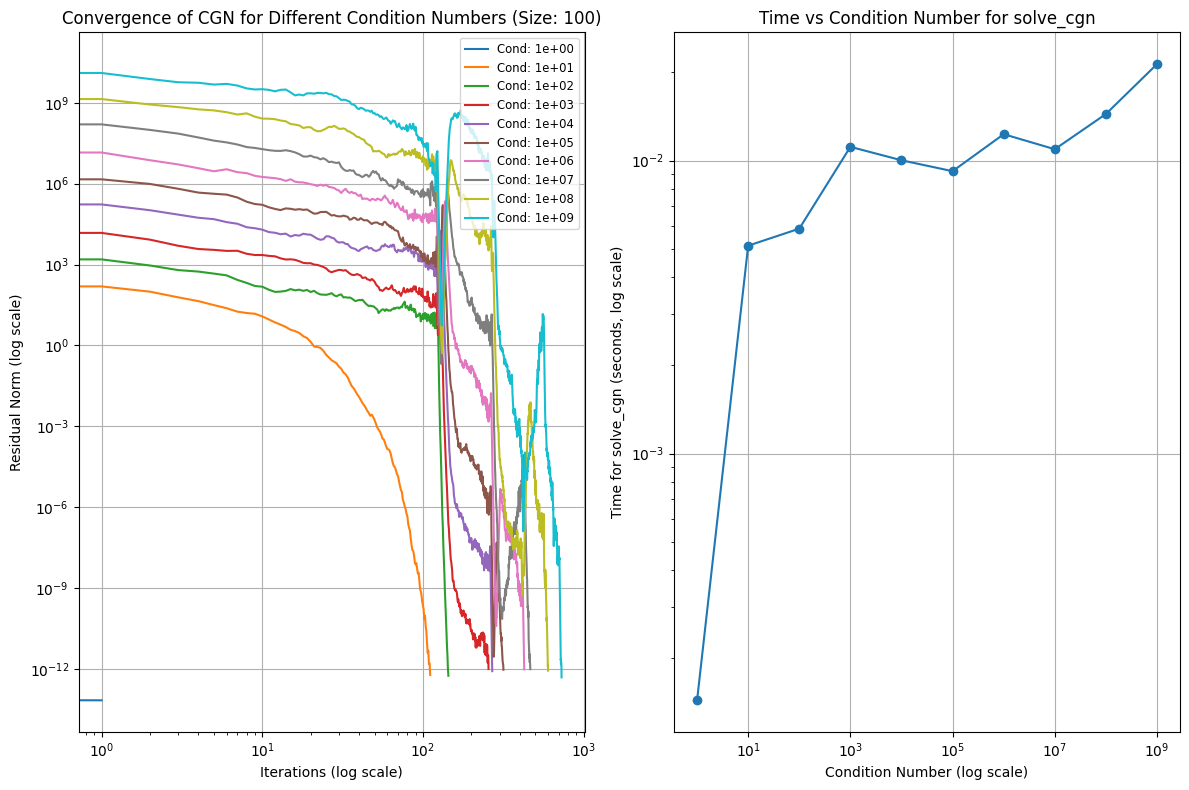

In [7]:
import time
import matplotlib.pyplot as plt

# Fixed matrix size
fixed_size = 100 # change — 124 was unstable
condition_numbers = [1, 1e1, 1e2, 1e3, 1e4, 1e5, 1e6, 1e7, 1e8, 1e9]  # change if unstable

# Store residuals and timing results
results_condition = {}
timings_condition = {}

for kappa in condition_numbers:
    b = np.random.rand(fixed_size)  # for random b.
    A = (matrixgenerators.cond_num_matrix(fixed_size, kappa)) * 10 # scaled to avoid too small entries
    
    start_time = time.time()
    _, residuals, _ = solve_cgn(A, b)  
    end_time = time.time()
    
    results_condition[kappa] = residuals
    timings_condition[kappa] = end_time - start_time  # time for cgs call 

plt.figure(figsize=(12, 8))

# residuals vs iteration
plt.subplot(1, 2, 1)
for kappa, residuals in results_condition.items():
    plt.plot(residuals, label=f"Cond: {kappa:.0e}")
plt.xscale('log')
plt.yscale('log')
plt.xlabel("Iterations (log scale)")
plt.ylabel("Residual Norm (log scale)")
plt.title(f"Convergence of CGN for Different Condition Numbers (Size: {fixed_size})")
plt.legend(loc="upper right", fontsize="small")
plt.grid()

# timing vs condition number
plt.subplot(1, 2, 2)
plt.plot(timings_condition.keys(), timings_condition.values(), marker='o')
plt.xscale('log')
plt.yscale('log')
plt.xlabel("Condition Number (log scale)")
plt.ylabel("Time for solve_cgn (seconds, log scale)")
plt.title("Time vs Condition Number for solve_cgn")
plt.grid()

plt.tight_layout()
plt.show()


Now we are going to examine how sparsity impacts convergence, fixing size but not condition number (cause sparsity will change condition number anyway and random matrices should not have too variable CN).

Sparsity: 0, Condition Number: 2.98e+02
Sparsity: 0.1, Condition Number: 3.72e+02
Sparsity: 0.3, Condition Number: 4.95e+02
Sparsity: 0.5, Condition Number: 2.18e+02
Sparsity: 0.7, Condition Number: 3.72e+01
Sparsity: 0.9, Condition Number: 1.15e+32


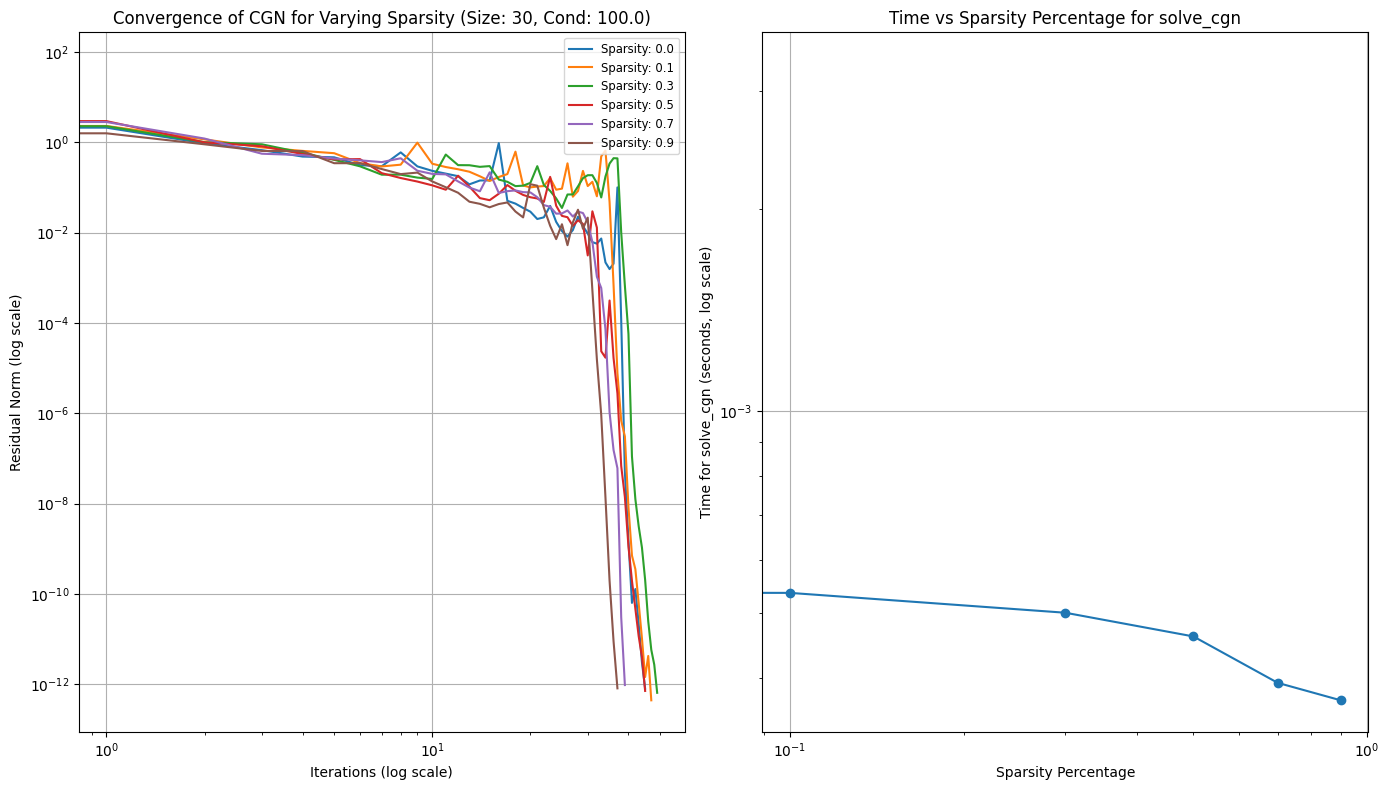

In [9]:
# Experiment parameters
fixed_size = 30  # Fixed matrix size
fixed_kappa = 1e2  # Fixed condition number
sparsity_levels = [0, 0.1, 0.3, 0.5, 0.7, 0.9]  # Sparsity percentages (0 = dense, 0.9 = very sparse)

# Store results
results_sparsity = {}
timings_sparsity = {}
condition_numbers = {}

for sparsity in sparsity_levels:
    # Generate matrix and make it sparse
    #dense_matrix = matrixgenerators.cond_num_matrix(fixed_size, fixed_kappa)
    dense_matrix = np.random.rand(fixed_size, fixed_size)
    sparse_matrix = matrixgenerators.make_matrix_sparse(dense_matrix, sparsity)
    
    # Calculate and store the condition number of the sparse matrix
    cond_num = np.linalg.cond(sparse_matrix)
    condition_numbers[sparsity] = cond_num
    print(f"Sparsity: {sparsity}, Condition Number: {cond_num:.2e}")
    
    # Generate random b
    b = np.random.rand(fixed_size)
    
    # Time solve_cgs and track residuals
    start_time = time.time()
    _, residuals, _ = solve_cgn(sparse_matrix, b)
    end_time = time.time()
    
    results_sparsity[sparsity] = residuals
    timings_sparsity[sparsity] = end_time - start_time

# Plot results
plt.figure(figsize=(14, 8))

# Subplot 1: Residuals vs iterations for varying sparsity
plt.subplot(1, 2, 1)
for sparsity, residuals in results_sparsity.items():
    plt.plot(residuals, label=f"Sparsity: {sparsity:.1f}")
plt.xscale('log')
plt.yscale('log')
plt.xlabel("Iterations (log scale)")
plt.ylabel("Residual Norm (log scale)")
plt.title(f"Convergence of CGN for Varying Sparsity (Size: {fixed_size}, Cond: {fixed_kappa})")
plt.legend(loc="upper right", fontsize="small")
plt.grid()

# Subplot 2: Time vs sparsity percentage
plt.subplot(1, 2, 2)
plt.plot(timings_sparsity.keys(), timings_sparsity.values(), marker='o')
plt.xscale('log')
plt.yscale('log')
plt.xlabel("Sparsity Percentage")
plt.ylabel("Time for solve_cgn (seconds, log scale)")
plt.title("Time vs Sparsity Percentage for solve_cgn")
plt.grid()

plt.tight_layout()
plt.show()


Finally same Eigenvalue experiment

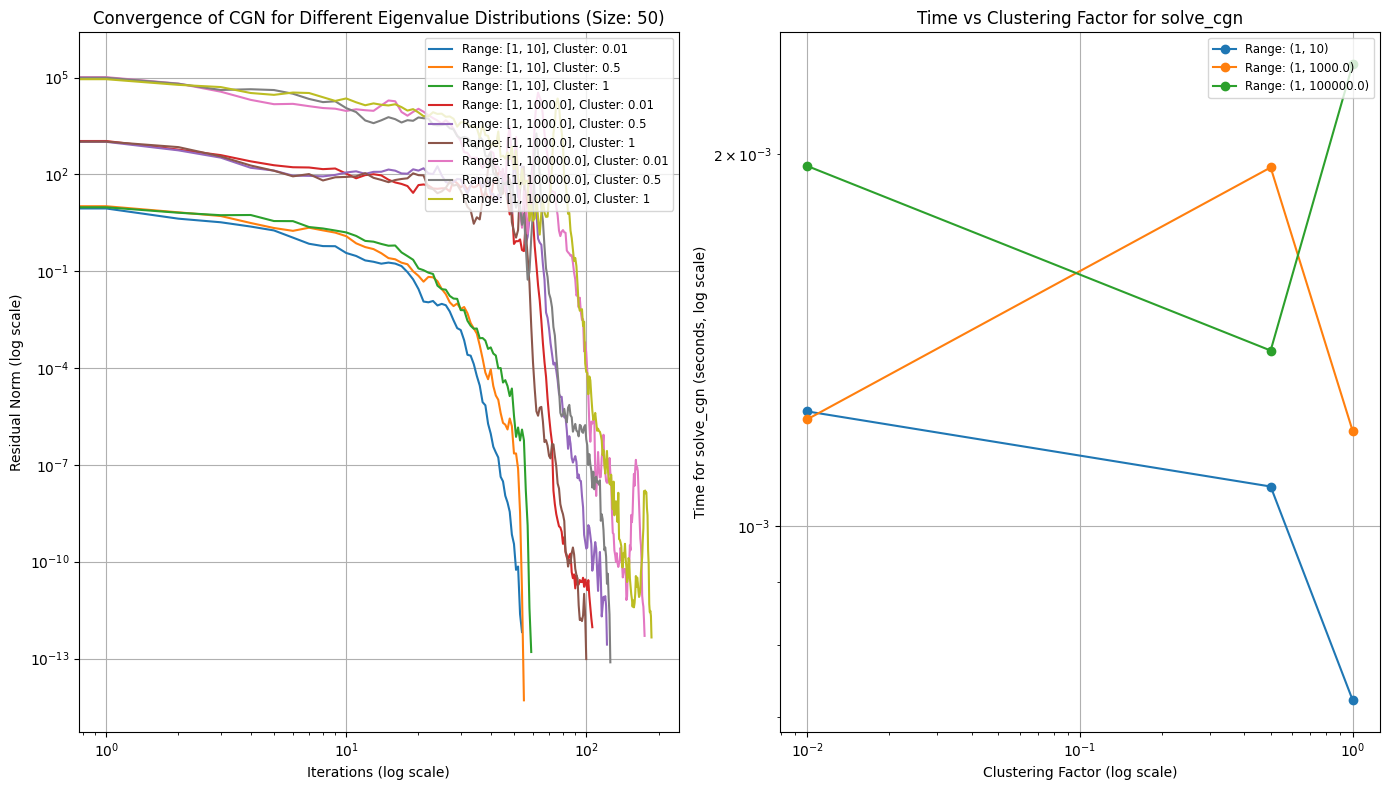

In [10]:
import time
import matplotlib.pyplot as plt

# Experiment parameters
fixed_size = 50  # Matrix size
eigen_ranges = [(1, 10), (1, 1e3), (1, 1e5)]  # Varying spectral ranges
clustering_factors = [0.01, 0.5, 1]  # Controls clustering within ranges

# Store results
results_eigenvalues = {}
timings_eigenvalues = {}

for eigen_min, eigen_max in eigen_ranges:
    for cluster_factor in clustering_factors:
        eigen_min_adj = eigen_min
        eigen_max_adj = eigen_min + cluster_factor * (eigen_max - eigen_min)
        
        # Generate matrix with specified eigenvalue clustering
        matrix, _ = matrixgenerators.generate_eigenvalue_range(fixed_size, eigen_min_adj, eigen_max)
        
        # Generate random b
        b = np.random.rand(fixed_size)
        
        # Time solve_cgs and track residuals
        start_time = time.time()
        _, residuals, _ = solve_cgn(matrix, b)
        end_time = time.time()
        
        # Store results
        key = (eigen_min, eigen_max, cluster_factor)
        results_eigenvalues[key] = residuals
        timings_eigenvalues[key] = end_time - start_time

# Plot results
plt.figure(figsize=(14, 8))

# Subplot 1: Residuals vs iterations for varying eigenvalue distributions
plt.subplot(1, 2, 1)
for key, residuals in results_eigenvalues.items():
    eigen_min, eigen_max, cluster_factor = key
    plt.plot(residuals, label=f"Range: [{eigen_min}, {eigen_max}], Cluster: {cluster_factor}")
plt.xscale('log')
plt.yscale('log')
plt.xlabel("Iterations (log scale)")
plt.ylabel("Residual Norm (log scale)")
plt.title(f"Convergence of CGN for Different Eigenvalue Distributions (Size: {fixed_size})")
plt.legend(loc="upper right", fontsize="small")
plt.grid()

# Subplot 2: Time vs clustering factor
plt.subplot(1, 2, 2)
for eigen_range in eigen_ranges:
    cluster_times = [timings_eigenvalues[(eigen_range[0], eigen_range[1], cf)] for cf in clustering_factors]
    plt.plot(clustering_factors, cluster_times, marker='o', label=f"Range: {eigen_range}")
plt.xscale('log')
plt.yscale('log')
plt.xlabel("Clustering Factor (log scale)")
plt.ylabel("Time for solve_cgn (seconds, log scale)")
plt.title("Time vs Clustering Factor for solve_cgn")
plt.legend(loc="upper right", fontsize="small")
plt.grid()

plt.tight_layout()
plt.show()
